# Plot of input variables

In this example I'm plotting input variable histograms, both for a signal dataset (`hpluscb_160`) and a background dataset (`ttbarlight`)


## Definition of data

Data is located in to directories: `Geometric_Data_Even` for training data and ``Geometric_Data_Odd` for testing data.

Data is stored in `PytorhGeometric` objects acrosss multiple `.pkl` files. Each `.pkl` contains approximately 5000 ``PytorchGeometric` objects, each one those objects representing an unique event. `.pkl` files containing `PytorchGeometric` objects are named `graphs_xxxx.pkl` where `xxxx` is an index number going form 1 to ~1000.

`PytorchGeometric` objects can come from several types of signal and background evens:
 - Hpluscb_60
 - Hpluscb_110
 - Hpluscb_160
 - ttbarlight
 - ttbarcc
 - ttbarbb

One `.pkl` file contains objects of only one type of event. Files containing the same type of event are numbered consecutively. Files from the training directory and the testing directory with the same index number contain objects of the same type.

A `json` file `utils/geometric_indices.json` maps each of the event type with the first.

## Selection of data for this experiment

For this "naive" experiment we are sbusets of signal data from two types of events: `Hpluscb_110` and `Hpluscb_160`and subset of each of the three background files `ttbarlight`, `ttbarcc` and `ttbarbb`.

We will manually take the following files:
 - `Hpluscb_110`: 5
 - `Hpluscb_160`: 11
 - `ttbarlight`: 13
 - `ttbarcc`: 93
 - `ttbarvv`: 269

In the next code section we create the loaders for training and testing data providing the indices of the files we want to use for this experiment: [11, 12, 13, 14]. This numbers can be automatically read from the corresponding `json` files, butnthey are provided explicitly for clarity.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# Import custom libraries
SRC_PATH = Path(os.path.abspath('./..'))
sys.path.insert(0, str(SRC_PATH))  # Add source directory to PYTHONPATH

import gnn_tools.data as gnn_data


# Create array of indices to use
indices_110 = np.array([5])
indices_160 = np.array([11])
indices_light = np.array([13])
indices_cc = np.array([93])
indices_bb = np.array([269])

# Generate loaders for train and test sets
path_train = SRC_PATH / 'Geometric_Data_Even'
loader_110 = gnn_data.Loader(path_train, indices_110)
loader_160 = gnn_data.Loader(path_train, indices_160)
loader_light = gnn_data.Loader(path_train, indices_light)
loader_cc = gnn_data.Loader(path_train, indices_cc)
loader_bb = gnn_data.Loader(path_train, indices_bb)

# Create DataBatches for signal and background
data_110 = next(loader_110)
data_160 = next(loader_160)
data_light = next(loader_light)
data_cc = next(loader_cc)
data_bb = next(loader_bb)

Opening file /mnt/c/Users/ikerg/Fitxategiak/Unibertsitatea/Master in High Energy Physics, Astrophysics and Cosmology/Master Thesis/Project/Hplus-gnn/Geometric_Data_Even/graphs_5.pkl:
Opening file /mnt/c/Users/ikerg/Fitxategiak/Unibertsitatea/Master in High Energy Physics, Astrophysics and Cosmology/Master Thesis/Project/Hplus-gnn/Geometric_Data_Even/graphs_11.pkl:
Opening file /mnt/c/Users/ikerg/Fitxategiak/Unibertsitatea/Master in High Energy Physics, Astrophysics and Cosmology/Master Thesis/Project/Hplus-gnn/Geometric_Data_Even/graphs_13.pkl:
Opening file /mnt/c/Users/ikerg/Fitxategiak/Unibertsitatea/Master in High Energy Physics, Astrophysics and Cosmology/Master Thesis/Project/Hplus-gnn/Geometric_Data_Even/graphs_93.pkl:
Opening file /mnt/c/Users/ikerg/Fitxategiak/Unibertsitatea/Master in High Energy Physics, Astrophysics and Cosmology/Master Thesis/Project/Hplus-gnn/Geometric_Data_Even/graphs_269.pkl:


In [2]:
# Extract node features info
pt_110 = data_110.x[:,0].numpy()
phi_110 = data_110.x[:,1].numpy()
eta_110 = data_110.x[:,2].numpy()
encoding_110 = data_110.x[:,5].numpy()

pt_160 = data_160.x[:,0].numpy()
phi_160 = data_160.x[:,1].numpy()
eta_160 = data_160.x[:,2].numpy()
encoding_160 = data_160.x[:,5].numpy()

pt_light = data_light.x[:,0].numpy()
phi_light = data_light.x[:,1].numpy()
eta_light = data_light.x[:,2].numpy()
encoding_light = data_light.x[:,5].numpy()

pt_cc = data_cc.x[:,0].numpy()
phi_cc = data_cc.x[:,1].numpy()
eta_cc = data_cc.x[:,2].numpy()
encoding_cc = data_cc.x[:,5].numpy()

pt_bb = data_bb.x[:,0].numpy()
phi_bb = data_bb.x[:,1].numpy()
eta_bb = data_bb.x[:,2].numpy()
encoding_bb = data_bb.x[:,5].numpy()

# Extract global features info
m_leading_bjet_110 = data_110.u[:,0].numpy()
m_maxdr_110 = data_110.u[:,1].numpy()
m_mindr_110 = data_110.u[:,2].numpy()
n_jets_110 = data_110.u[:,3].numpy()
n_bjets_110 = data_110.u[:,4].numpy()

m_leading_bjet_160 = data_160.u[:,0].numpy()
m_maxdr_160 = data_160.u[:,1].numpy()
m_mindr_160 = data_160.u[:,2].numpy()
n_jets_160 = data_160.u[:,3].numpy()
n_bjets_160 = data_160.u[:,4].numpy()

m_leading_bjet_light = data_light.u[:,0].numpy()
m_maxdr_light = data_light.u[:,1].numpy()
m_mindr_light = data_light.u[:,2].numpy()
n_jets_light = data_light.u[:,3].numpy()
n_bjets_light = data_light.u[:,4].numpy()

m_leading_bjet_cc = data_cc.u[:,0].numpy()
m_maxdr_cc = data_cc.u[:,1].numpy()
m_mindr_cc = data_cc.u[:,2].numpy()
n_jets_cc = data_cc.u[:,3].numpy()
n_bjets_cc = data_cc.u[:,4].numpy()

m_leading_bjet_bb = data_bb.u[:,0].numpy()
m_maxdr_bb = data_bb.u[:,1].numpy()
m_mindr_bb = data_bb.u[:,2].numpy()
n_jets_bb = data_bb.u[:,3].numpy()
n_bjets_bb = data_bb.u[:,4].numpy()

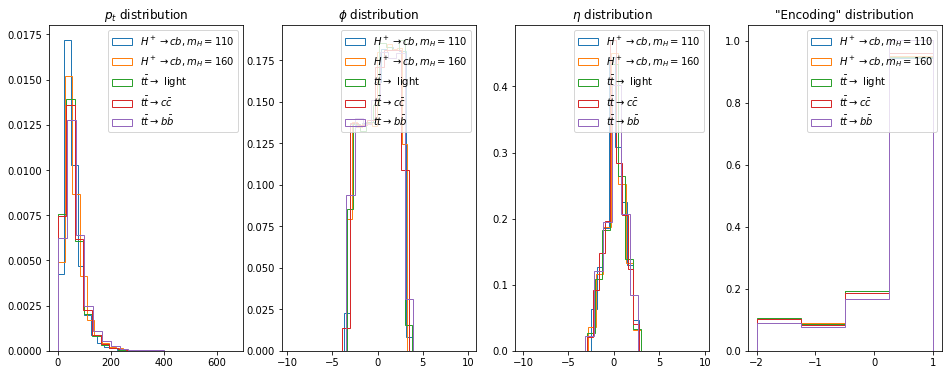

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(16,6))


ax[0].set_title('$p_t$ distribution')
ax[0].hist(pt_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[0].hist(pt_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[0].hist(pt_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[0].hist(pt_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[0].hist(pt_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[0].legend()

ax[1].set_title('$\phi$ distribution')
ax[1].hist(phi_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[1].hist(phi_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[1].hist(phi_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[1].hist(phi_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[1].hist(phi_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[1].legend()

ax[2].set_title('$\eta$ distribution')
ax[2].hist(eta_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[2].hist(eta_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[2].hist(eta_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[2].hist(eta_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[2].hist(eta_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[2].legend()

ax[3].set_title('"Encoding" distribution')
ax[3].hist(encoding_110, bins=4, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[3].hist(encoding_160, bins=4, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[3].hist(encoding_light, bins=4, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[3].hist(encoding_cc, bins=4, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[3].hist(encoding_bb, bins=4, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[3].legend()

fig.savefig('../plots/ex3_input_nodefeats.png', facecolor='white', transparent=False)

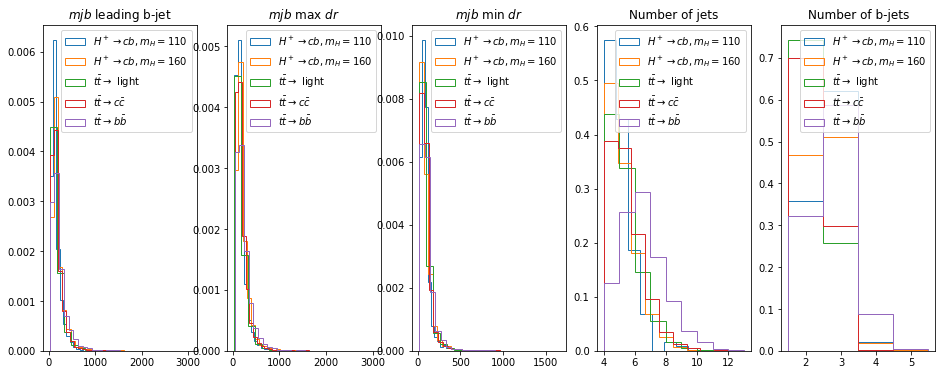

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(16,6))


ax[0].set_title('$mjb$ leading b-jet')
ax[0].hist(m_leading_bjet_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[0].hist(m_leading_bjet_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[0].hist(m_leading_bjet_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[0].hist(m_leading_bjet_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[0].hist(m_leading_bjet_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[0].legend()

ax[1].set_title('$mjb$ max $dr$')
ax[1].hist(m_maxdr_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[1].hist(m_maxdr_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[1].hist(m_maxdr_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[1].hist(m_maxdr_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[1].hist(m_maxdr_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[1].legend()

ax[2].set_title('$mjb$ min $dr$')
ax[2].hist(m_mindr_110, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[2].hist(m_mindr_160, bins=20, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[2].hist(m_mindr_light, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[2].hist(m_mindr_cc, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[2].hist(m_mindr_bb, bins=20, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[2].legend()

ax[3].set_title('Number of jets')
ax[3].hist(n_jets_110, bins=9, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[3].hist(n_jets_160, bins=9, density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[3].hist(n_jets_light, bins=9, density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[3].hist(n_jets_cc, bins=9, density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[3].hist(n_jets_bb, bins=9, density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[3].legend()

ax[4].set_title('Number of b-jets')
ax[4].hist(n_bjets_110, bins=np.array([1.5,2.5,3.5,4.5,5.5]), density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=110$')
ax[4].hist(n_bjets_160, bins=np.array([1.5,2.5,3.5,4.5,5.5]), align='mid', density=True, histtype='step', label=r'$H^+\rightarrow cb, m_H=160$')
ax[4].hist(n_bjets_light, bins=np.array([1.5,2.5,3.5,4.5,5.5]), align='mid', density=True, histtype='step', label=r'$t \bar{t} \rightarrow $ light')
ax[4].hist(n_bjets_cc, bins=np.array([1.5,2.5,3.5,4.5,5.5]), align='mid', density=True, histtype='step', label=r'$t \bar{t} \rightarrow c \bar{c}$')
ax[4].hist(n_bjets_bb, bins=np.array([1.5,2.5,3.5,4.5,5.5]), align='mid', density=True, histtype='step', label=r'$t \bar{t} \rightarrow b \bar{b}$')
ax[4].legend()

fig.savefig('../plots/ex3_input_globalfeats.png', facecolor='white', transparent=False)